Decision Tree Classification Tutorial

In [167]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt

In [ ]:
age=np.random.uniform(low=20,high=70,size=1000)
income=(np.random.pareto(a=2,size=1000) + 1)*20000
x=np.vstack([age,income]).T
y=np.random.randint(low=0,high=2,size=1000)

In [134]:
a,b,c,d=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
model=DecisionTreeClassifier(criterion="gini",random_state=1)
crossv=cross_validate(estimator=model,X=a,y=c,scoring="roc_auc",cv=7)
print("Prediction AUROC will be around; ",pd.Series(crossv["test_score"]).median())
model.fit(a,c)
probs=model.predict_proba(b)[:,1]
pred=model.predict(b)
roc_auc_score(d,probs),accuracy_score(d,pred)

Prediction AUROC will be around;  0.4913793103448275


(0.5002000800320128, 0.5)

In [135]:
a,b,c,d=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
model=DecisionTreeClassifier(criterion="entropy",random_state=1)
crossv=cross_validate(estimator=model,X=a,y=c,scoring="roc_auc",cv=7)
print("Prediction AUROC will be around; ",pd.Series(crossv["test_score"]).median())
model.fit(a,c)
probs=model.predict_proba(b)[:,1]
pred=model.predict(b)
roc_auc_score(d,probs),accuracy_score(d,pred)

Prediction AUROC will be around;  0.48714458560193596


(0.4646858743497399, 0.465)

In [136]:
a,b,c,d=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
model=DecisionTreeClassifier(criterion="log_loss",random_state=1)
crossv=cross_validate(estimator=model,X=a,y=c,scoring="roc_auc",cv=7)
print("Prediction AUROC will be around; ",pd.Series(crossv["test_score"]).median())
model.fit(a,c)
probs=model.predict_proba(b)[:,1]
pred=model.predict(b)
roc_auc_score(d,probs),accuracy_score(d,pred)

Prediction AUROC will be around;  0.48714458560193596


(0.4646858743497399, 0.465)

In [137]:
# everything random, logloss and entropy exceeded our prediction, let's increase the test size

In [138]:
age=np.random.uniform(low=20, high=70, size=10000)
income=(np.random.pareto(a=2, size=10000) + 1) * 20000
x=np.vstack([age,income]).T
y=np.random.randint(low=0,high=2,size=10000)

In [139]:
a,b,c,d=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
model=DecisionTreeClassifier(criterion="gini",random_state=1)
crossv=cross_validate(estimator=model,X=a,y=c,scoring="roc_auc",cv=7)
print("Prediction AUROC will be around; ",pd.Series(crossv["test_score"]).median())
model.fit(a,c)
probs=model.predict_proba(b)[:,1]
pred=model.predict(b)
roc_auc_score(d,probs),accuracy_score(d,pred)

Prediction AUROC will be around;  0.5101207571201999


(0.49955799292788683, 0.4995)

In [140]:
a,b,c,d=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
model=DecisionTreeClassifier(criterion="entropy",random_state=1)
crossv=cross_validate(estimator=model,X=a,y=c,scoring="roc_auc",cv=7)
print("Prediction AUROC will be around; ",pd.Series(crossv["test_score"]).median())
model.fit(a,c)
probs=model.predict_proba(b)[:,1]
pred=model.predict(b)
roc_auc_score(d,probs),accuracy_score(d,pred)

Prediction AUROC will be around;  0.49700097365020857


(0.5080081281300501, 0.508)

In [141]:
a,b,c,d=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
model=DecisionTreeClassifier(criterion="log_loss",random_state=1)
crossv=cross_validate(estimator=model,X=a,y=c,scoring="roc_auc",cv=7)
print("Prediction AUROC will be around; ",pd.Series(crossv["test_score"]).median())
model.fit(a,c)
probs=model.predict_proba(b)[:,1]
pred=model.predict(b)
roc_auc_score(d,probs),accuracy_score(d,pred)

Prediction AUROC will be around;  0.49700097365020857


(0.5080081281300501, 0.508)

In [ ]:
# our predictions are accurate
# so large and samll datasets affects the, decision trees are prone to overfitting 

In [ ]:
income_brackets=pd.cut(income,bins=[0,30000,60000,90000,np.inf],labels=[0,1,2,3])
age_groups=pd.cut(age,bins=[20,30,40,50,60,70],labels=[0,1,2,3,4])
X=np.column_stack((age_groups,income_brackets))
a,b,c,d=train_test_split(x,y,test_size=0.2,random_state=1,stratify=y)
model=DecisionTreeClassifier(criterion="log_loss",random_state=1)
crossv=cross_validate(estimator=model,X=a,y=c,scoring="roc_auc",cv=7)
print("Prediction: AUROC will be near, ",pd.Series(crossv["test_score"]).median())
model.fit(a,c)
probs=model.predict_proba(b)[:,1]
pred=model.predict(b)
roc_auc_score(d,probs),accuracy_score(d,pred)

Prediction: AUROC will be near,  0.49700097365020857


(0.5080081281300501, 0.508)

In [144]:
data=fetch_california_housing(as_frame=True).frame

In [145]:
data["MedHouseVal"]=(data["MedHouseVal"]>data["MedHouseVal"].median()).astype(int)

In [146]:
data["MedHouseVal"].value_counts()

MedHouseVal
0    10323
1    10317
Name: count, dtype: int64

In [147]:
x=data.drop("MedHouseVal",axis=True)
y=data["MedHouseVal"]

In [148]:
a,b,c,d=train_test_split(x,y,train_size=10000,random_state=1,stratify=y)

In [149]:
model=DecisionTreeClassifier(criterion="log_loss", max_depth=10, random_state=1)
crossv=cross_validate(model,cv=10,X=a,y=c,scoring="roc_auc")
print("Prediction: AUROC will be near, ",pd.Series(crossv["test_score"]).median())
model.fit(a, c)
probs=model.predict_proba(b)[:,1]
pred=model.predict(b)
roc_auc_score(d,probs),accuracy_score(d,pred)

Prediction: AUROC will be near,  0.8815277642870571


(0.896723832144812, 0.8451127819548873)

In [150]:
print(classification_report(d,pred))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      5322
           1       0.84      0.85      0.85      5318

    accuracy                           0.85     10640
   macro avg       0.85      0.85      0.85     10640
weighted avg       0.85      0.85      0.85     10640



In [151]:
confusion_matrix(d,pred)

array([[4476,  846],
       [ 802, 4516]], dtype=int64)

In [166]:
model=DecisionTreeClassifier()
para={"criterion":["gini","entropy","log_loss"],
      "ccp_alpha":[0.001,0.01,0.1,1],
      "min_samples_split":[2,6,10],
      "min_samples_leaf":[2,4,6],
      "max_leaf_nodes":[2,4,6],
      "max_features":["sqrt","log2"],
      }
rscv=GridSearchCV(estimator=model,param_grid=para,scoring=["f1","roc_auc"],cv=10,verbose=1,refit="roc_auc",return_train_score=True)
rscv.fit(a,c)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.001, 0.01, 0.1, 1],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'max_leaf_nodes': [2, 4, 6],
                         'min_samples_leaf': [2, 4, 6],
                         'min_samples_split': [2, 6, 10]},
             refit='roc_auc', return_train_score=True,
             scoring=['f1', 'roc_auc'], verbose=1)

In [176]:
a=rscv.predict_proba(b)[:,1]
roc_auc_score(d,a)

0.8171142294807833

In [179]:
rscv.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy',
                       max_features='log2', max_leaf_nodes=6,
                       min_samples_leaf=6, min_samples_split=6)

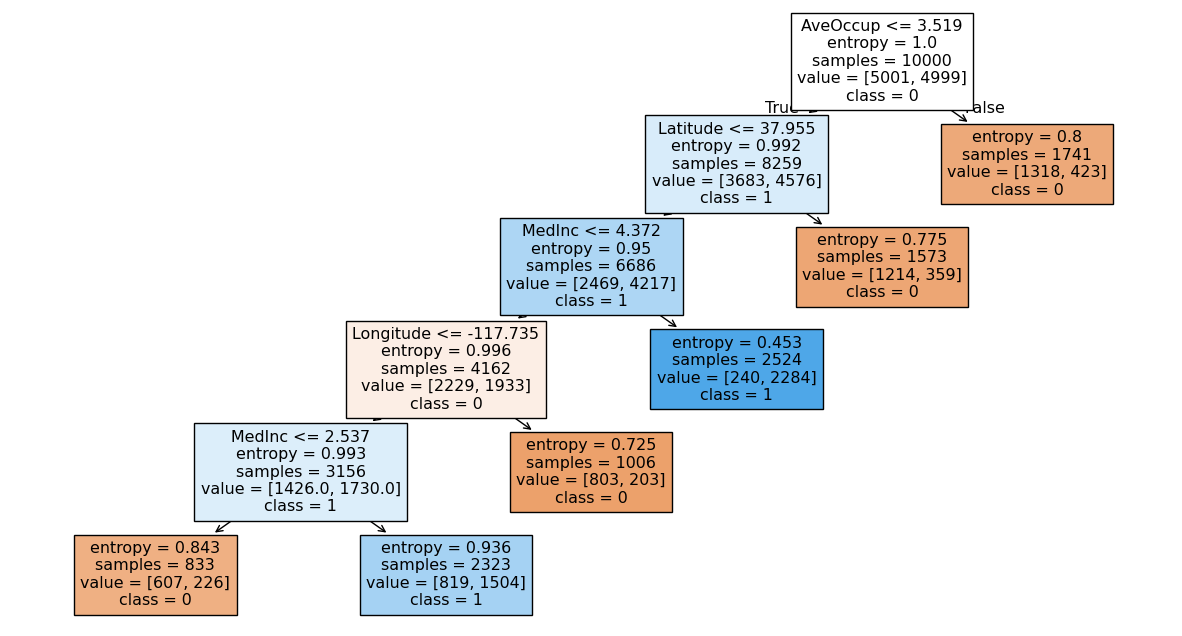

In [178]:
plt.figure(figsize=(15, 8))
plot_tree(rscv.best_estimator_, feature_names=x.columns, class_names=["0", "1"], filled=True)
plt.show()